In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [145]:
# loading iris dataset from sklearn
iris = datasets.load_iris()

In [133]:
# converting the iris dataset to a dataframe
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['species'] = iris['target_names'][iris['target']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [134]:
df.info()
# from the below information we can see that there aren't any null data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [135]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


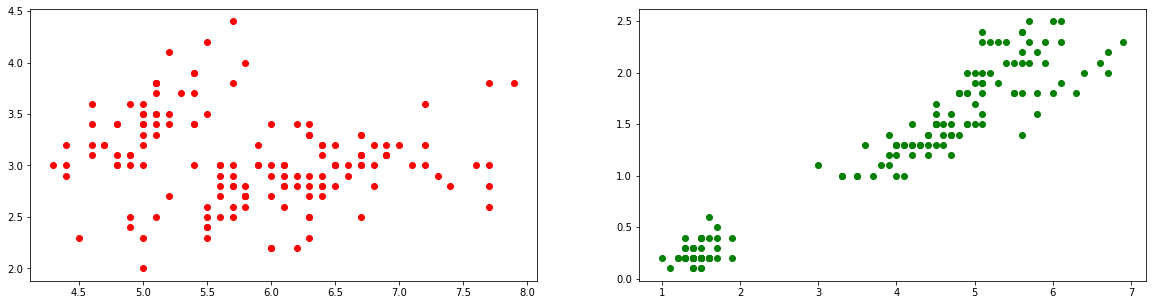

In [136]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color='red')
plt.subplot(1,2,2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color='green')
# we can see them linearly seperable

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [138]:
# splitting dataframe to features and target variables
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [140]:
# use logistic regression
lr = LogisticRegression(multi_class='auto', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [141]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [143]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [144]:
print(accuracy_score(y_test, y_pred))

0.9777777777777777
